# Generating outliers in tabular data

This tutorial shows how to generate outliers (extreme values) by generating data points with a z-score greater than 3.

In [1]:
from sklearn.datasets import load_iris
from badgers.transforms.tabular_data.outliers import ZScoreTransformer, PCATransformer, KernelPCATransformer, DecompositionZScoreTransformer
import matplotlib.pyplot as plt
import numpy as np

## Load and prepare data

We first load an existing dataset from `sklearn.datasets`

In [2]:
data = load_iris()

X = data['data']
y = data['target']

## Generate outliers using a simple z-score transformer

The transformer generates data points with a z-score greater than 3 for each dimension

In [3]:
trf = ZScoreTransformer(percentage_outliers=5)
Xt = trf.transform(X.copy())

## Visualize the orginal and the transformed data

In [4]:
def plot_outliers(X, y, Xt, target_names, feature_names):
    """
    Some utility function to generate the plots
    """
    fig, axes = plt.subplots(1, 2, sharex=True, sharey=True, figsize=(8,4))
    for label in range(len(target_names)):
        ix = np.where(y == label)
        axes[0].scatter(X[ix,0],X[ix,1], c = f'C{label}', label = target_names[label])
        axes[1].scatter(Xt[ix,0],Xt[ix,1],c = f'C{label}', label = target_names[label])
    axes[0].set_title('Original')
    axes[1].set_title('Transformed')
    axes[0].set_xlabel(feature_names[0], fontsize=10)
    axes[1].set_xlabel(feature_names[0], fontsize=10)
    axes[0].set_ylabel(feature_names[1], fontsize=10)
    axes[1].set_ylabel(feature_names[1], fontsize=10)
    axes[0].legend()
    axes[1].legend()
    return fig, axes


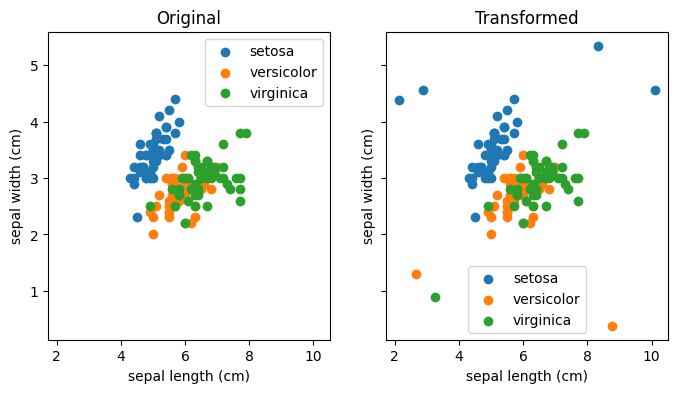

In [5]:
fig, axes = plot_outliers(X, y, Xt, data['target_names'], data['feature_names'])

## Generate outliers by first reducing the dimensions and then apply the z-score transformer

### Using PCATransformer

In [6]:
trf = PCATransformer(percentage_outliers=5, n_components=2)
Xt = trf.transform(X.copy())

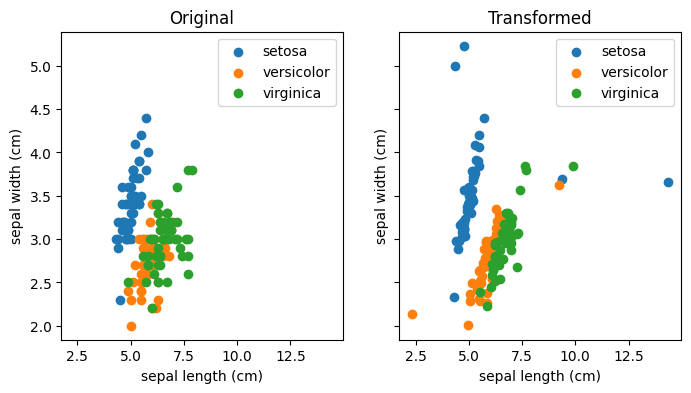

In [7]:
fig, axes = plot_outliers(X, y, Xt, data['target_names'], data['feature_names'])

### Using KernelPCATransformer

In [8]:
trf = KernelPCATransformer(percentage_outliers=5, n_components=2)
Xt = trf.transform(X.copy())

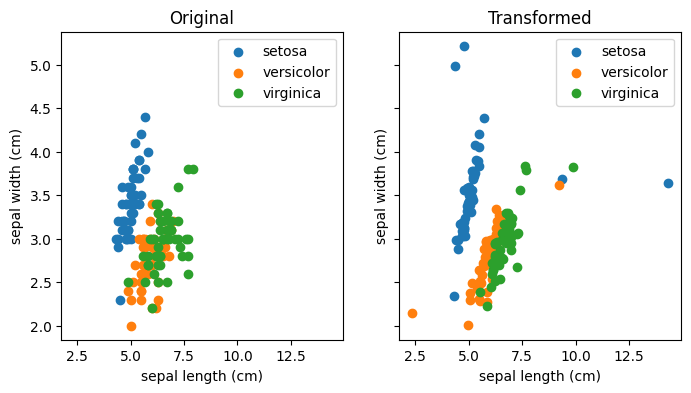

In [9]:
fig, axes = plot_outliers(X, y, Xt, data['target_names'], data['feature_names'])

## Using other dimension reduction techniques from sklearn

In [10]:
from sklearn.decomposition import FastICA

In [11]:
trf = DecompositionZScoreTransformer(
    percentage_outliers = 10, 
    n_components = 2, 
    decomposition_transformer_class = FastICA, 
    whiten='unit-variance'
)
Xt = trf.transform(X.copy())

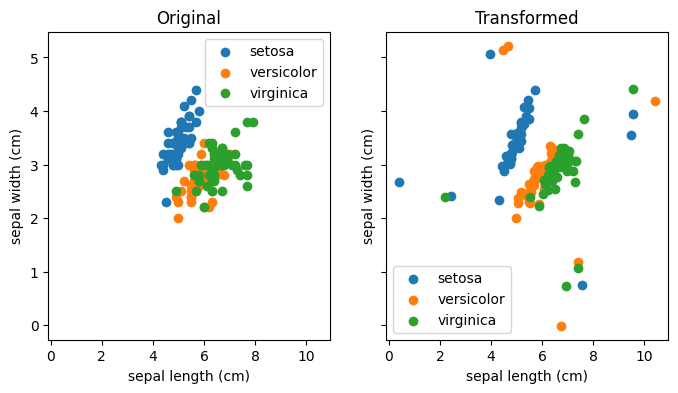

In [12]:
fig, axes = plot_outliers(X, y, Xt, data['target_names'], data['feature_names'])